# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [736]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [737]:
# Import the libraries
import numpy as np
import pandas as pd

In [738]:
pd.set_option('display.max_columns', None)

In [739]:
pd.set_option('display.max_rows', None)

In [740]:
import seaborn as sns
import matplotlib.pyplot as plt

### **1.1 Load the Data**

In [742]:
# Load the dataset
df = pd.read_csv("Employee_data.csv")

In [743]:
# Check the first few entries
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22.0,Associate Degree,Married,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21.0,Masterâ€™s Degree,Divorced,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11.0,Bachelorâ€™s Degree,Married,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27.0,High School,Single,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71.0,High School,Divorced,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [744]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [745]:
# Inspect the different columns in the dataset
df.columns 

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

In [746]:
# Inspect the different dtypes of columns in the dataset
df.dtypes 

Employee ID                     int64
Age                             int64
Gender                         object
Years at Company                int64
Job Role                       object
Monthly Income                  int64
Work-Life Balance              object
Job Satisfaction               object
Performance Rating             object
Number of Promotions            int64
Overtime                       object
Distance from Home            float64
Education Level                object
Marital Status                 object
Number of Dependents            int64
Job Level                      object
Company Size                   object
Company Tenure (In Months)    float64
Remote Work                    object
Leadership Opportunities       object
Innovation Opportunities       object
Company Reputation             object
Employee Recognition           object
Attrition                      object
dtype: object

In [747]:
# Inspect the different columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

### **1.2 Check the basic statistics**

In [749]:
# Check the summary of the dataset
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


### **1.3 Check the data type of columns**

In [751]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [755]:
# Check the number of missing values in each column
df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [757]:
# Check the percentage of missing values in each column
df.isnull().sum()/df.shape[0]*100

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [759]:
# Handle the missing value rows in the column

# Since the missing values is only 2-3% we can remove or subsiture the missing values with mean if there is no outlier and median in the case where we see outliers
# In our case we are dropping null values since, the percentage is only 3 percent

df = df.dropna()

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [761]:
# Check the percentage of remaining data after missing values are removed
df.isnull().sum()/df.shape[0]*100

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64

# Checking Duplicates

In [763]:
df.duplicated().sum()

77

In [764]:
#cross verifing the duplicate values
print("shape =", df.shape)
print("number of employee ID =", df["Employee ID"].nunique())

shape = (70635, 24)
number of employee ID = 70558


In [765]:
#yes there is a 77 number difference which means there are duplicate values! 

In [766]:
# since we found duplicates let's view duplicate rows 

df[df.duplicated()]

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
74501,17696,40,Female,4,Finance,5176,Poor,High,Average,0,No,48.0,High School,Single,0,Entry,Small,21.0,Yes,No,No,Good,High,Left
74524,24820,36,Female,7,Finance,9928,Poor,High,Average,0,No,65.0,Associate Degree,Single,3,Senior,Medium,28.0,No,No,Yes,Fair,Low,Left
74525,54523,28,Female,13,Finance,8685,Fair,Very High,Low,2,Yes,44.0,Associate Degree,Married,4,Mid,Small,60.0,No,No,No,Good,Medium,Left
74526,28074,34,Male,13,Finance,11336,Poor,High,High,1,No,54.0,Bachelorâ€™s Degree,Married,3,Senior,Large,32.0,No,No,No,Poor,Medium,Stayed
74527,18418,58,Male,22,Media,6488,Excellent,High,Average,1,Yes,10.0,Bachelorâ€™s Degree,Married,3,Mid,Medium,81.0,Yes,No,No,Good,Very High,Stayed
74528,25046,30,Male,12,Media,5369,Good,High,Below Average,0,No,64.0,High School,Married,0,Mid,Large,69.0,No,No,No,Fair,High,Stayed
74529,60739,56,Female,8,Technology,10334,Fair,Medium,Average,3,Yes,8.0,Masterâ€™s Degree,Single,2,Entry,Small,28.0,No,No,No,Good,High,Left
74530,56866,24,Male,2,Healthcare,9776,Fair,Very High,High,0,No,82.0,PhD,Divorced,3,Mid,Medium,51.0,No,No,Yes,Good,Low,Left
74531,3270,36,Male,11,Healthcare,7787,Good,High,High,0,No,26.0,Masterâ€™s Degree,Divorced,4,Entry,Small,43.0,No,No,No,Poor,Medium,Left
74532,47940,58,Female,28,Healthcare,8159,Fair,High,Below Average,0,Yes,2.0,Masterâ€™s Degree,Married,1,Mid,Medium,47.0,No,No,No,Good,High,Stayed


In [767]:
df = df.drop_duplicates()

In [768]:
df.shape # checking if duplicate values are removed

(70558, 24)

# Handling outliers

In [770]:
# Write a function segregate numeric and catagorical columns

cat_col = []
num_col = []
for col in df.columns:
    if df[col].dtypes == "object":
        cat_col.append(col)
    else:
        num_col.append(col)

print("cat_col =", cat_col)    
print("num_col =", num_col) 

cat_col = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']
num_col = ['Employee ID', 'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']


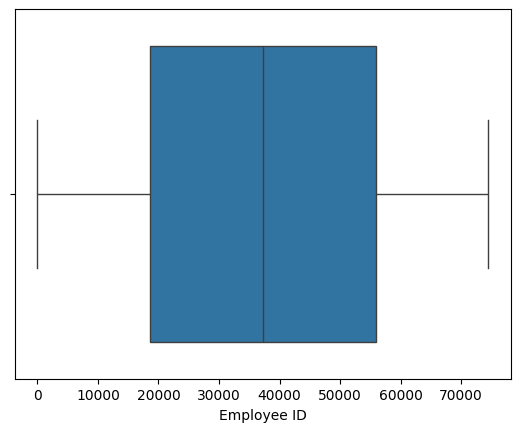

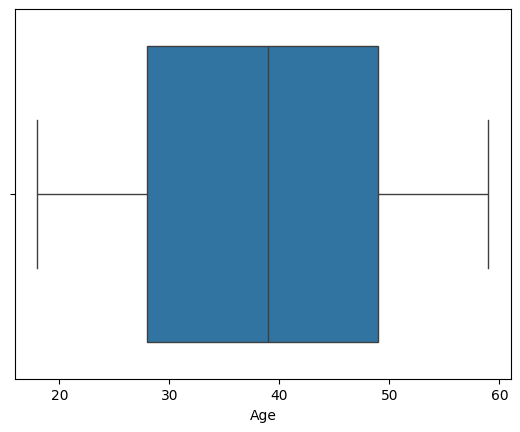

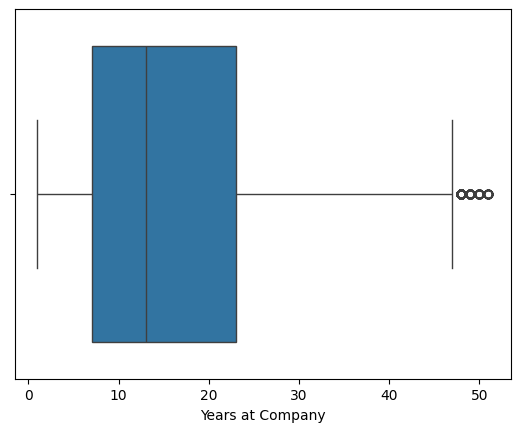

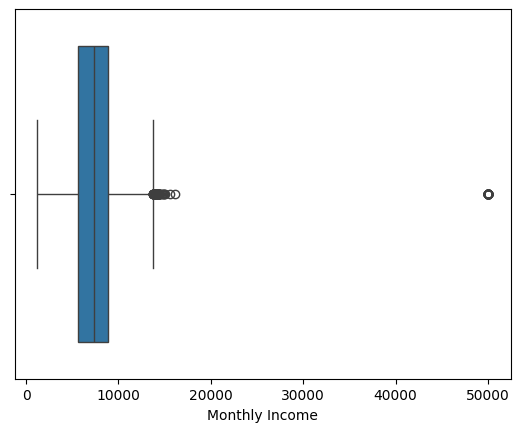

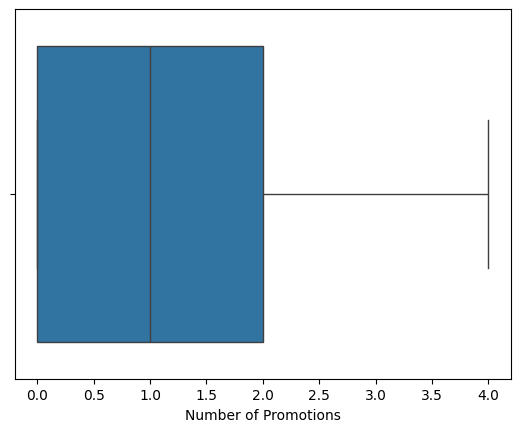

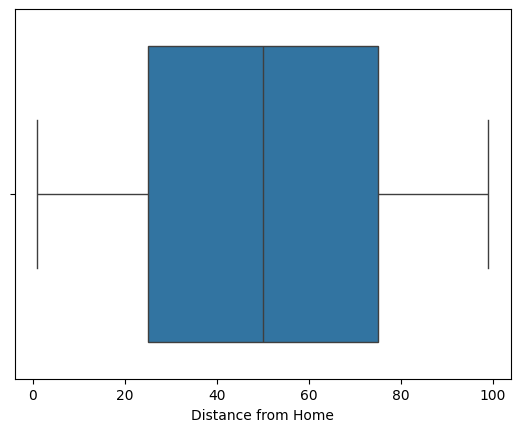

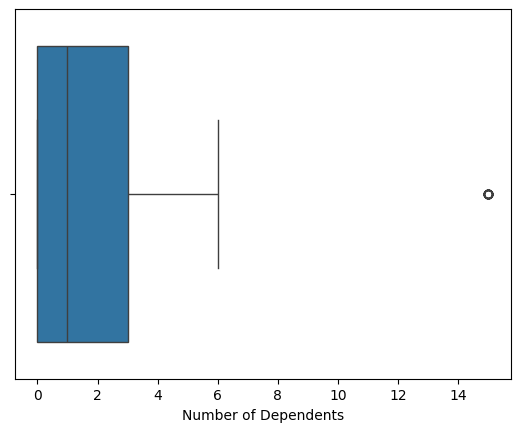

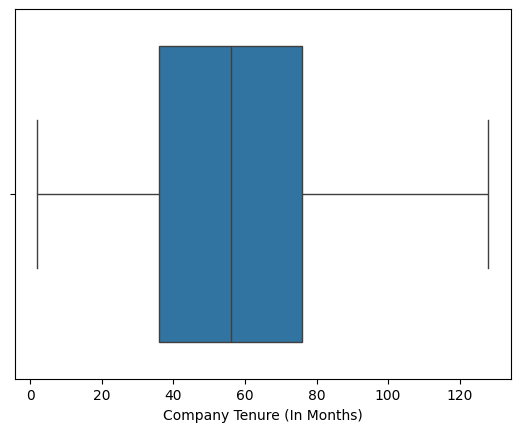

In [771]:
# Plotting box plot to identify outliers
for i in num_col:
    sns.boxplot(x=df[i])
    plt.show()

In [772]:
# As per the box plots we observe outliers in 'Years at Company', 'Monthly Income', and 'Number of Dependents'
#checking the values and treating the outliers 

### Outlier Treatment

In [774]:
Outlier_col = ['Years at Company', 'Monthly Income', 'Number of Dependents']

for col in Outlier_col:
    q1=df[col].quantile(0.25) # Q1 - 25th Percentile
    q3=df[col].quantile(0.75) # Q3 - 75th Percentile
    iqr=q3-q1                     # IQR - InterQuartile Range
    lower_whisker=q1-1.5*iqr      # Lower Bound
    upper_whisker=q3+1.5*iqr      # Upper Bound
    df[col]=np.where(df[col]>upper_whisker,upper_whisker,df[col]) #Capping
    df[col]=np.where(df[col]<lower_whisker,lower_whisker,df[col]) #Flooring

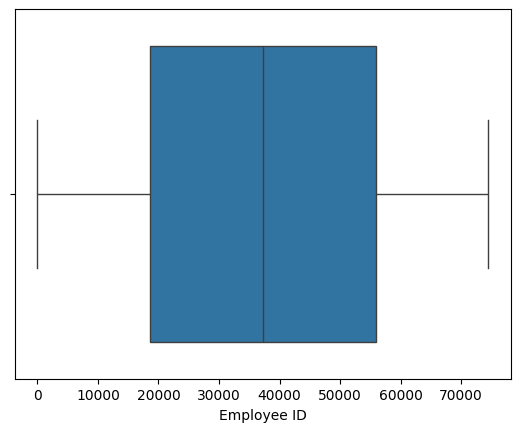

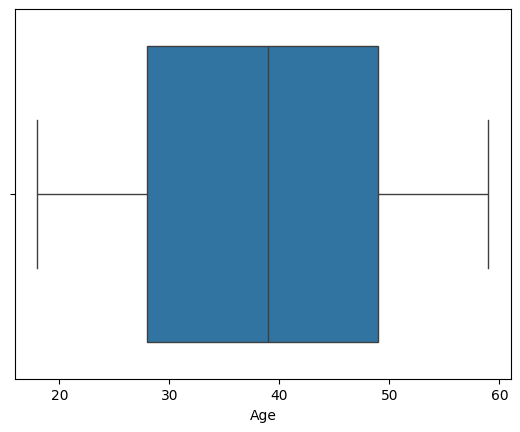

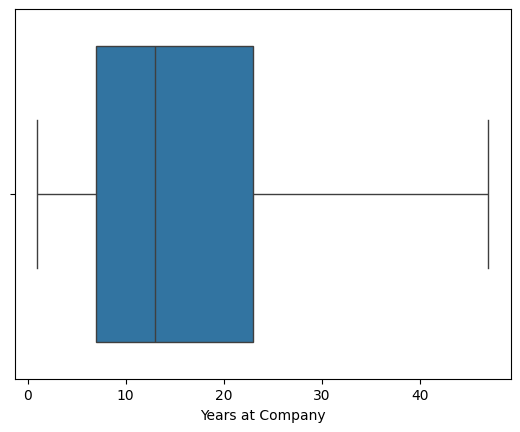

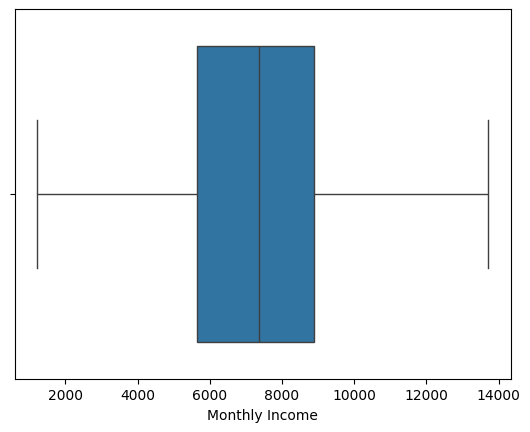

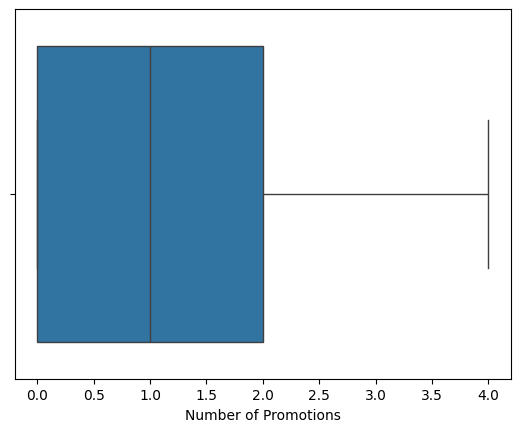

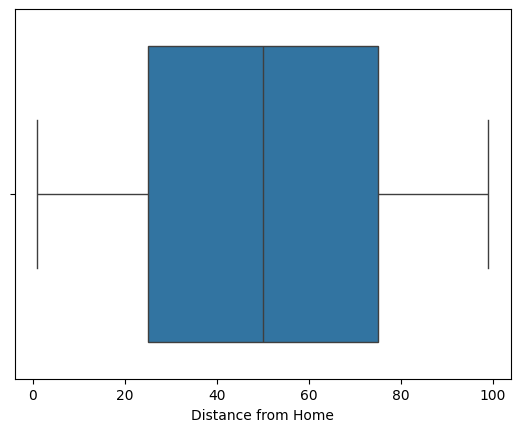

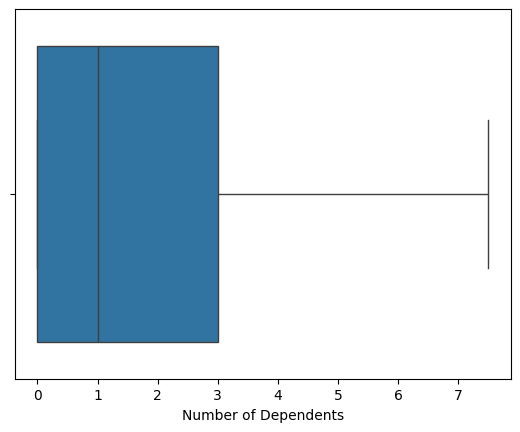

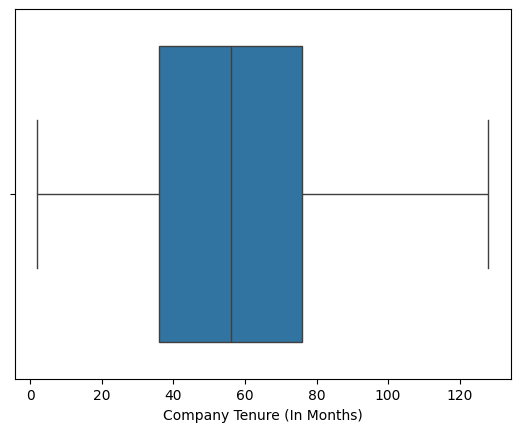

In [775]:
# checking if all the outliers are handled 

# Plotting box plot to identify outliers
for i in num_col:
    sns.boxplot(x=df[i])
    plt.show()

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [778]:
# Check the data #unique value of cat_Col
df[cat_col].nunique()

Gender                      2
Job Role                    5
Work-Life Balance           4
Job Satisfaction            4
Performance Rating          4
Overtime                    2
Education Level             5
Marital Status              3
Job Level                   3
Company Size                3
Remote Work                 2
Leadership Opportunities    2
Innovation Opportunities    2
Company Reputation          4
Employee Recognition        4
Attrition                   2
dtype: int64

In [779]:
for i in cat_col:
    print(i, "\n", df[i].value_counts(), "\n")

Gender 
 Male      38650
Female    31908
Name: Gender, dtype: int64 

Job Role 
 Technology    18323
Healthcare    16181
Education     14798
Media         11336
Finance        9920
Name: Job Role, dtype: int64 

Work-Life Balance 
 Good         26659
Fair         21377
Excellent    12725
Poor          9797
Name: Work-Life Balance, dtype: int64 

Job Satisfaction 
 High         35291
Very High    14267
Medium       13941
Low           7059
Name: Job Satisfaction, dtype: int64 

Performance Rating 
 Average          42358
High             14129
Below Average    10540
Low               3531
Name: Performance Rating, dtype: int64 

Overtime 
 No     47536
Yes    23022
Name: Overtime, dtype: int64 

Education Level 
 Bachelorâ€™s Degree    21147
Associate Degree       17658
Masterâ€™s Degree      14284
High School            13864
PhD                     3605
Name: Education Level, dtype: int64 

Marital Status 
 Married     35481
Single      24841
Divorced    10236
Name: Marital Status, dt

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [781]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19.0,Education,5390.0,Excellent,Medium,Average,2,No,22.0,Associate Degree,Married,0.0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4.0,Media,5534.0,Poor,High,Low,3,No,21.0,Masterâ€™s Degree,Divorced,3.0,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10.0,Healthcare,8159.0,Good,High,Low,0,No,11.0,Bachelorâ€™s Degree,Married,3.0,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7.0,Education,3989.0,Good,High,High,1,No,27.0,High School,Single,2.0,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41.0,Education,4821.0,Fair,Very High,Average,0,Yes,71.0,High School,Divorced,0.0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [782]:
# Drop redundant columns which are not required for modelling

# I believe Employee ID won't fetch is good information so, i am dropping that columns 

df.drop(columns = ["Employee ID"], inplace = True)

In [783]:
# check if the columnds has been dropped

df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19.0,Education,5390.0,Excellent,Medium,Average,2,No,22.0,Associate Degree,Married,0.0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,59,Female,4.0,Media,5534.0,Poor,High,Low,3,No,21.0,Masterâ€™s Degree,Divorced,3.0,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,24,Female,10.0,Healthcare,8159.0,Good,High,Low,0,No,11.0,Bachelorâ€™s Degree,Married,3.0,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,36,Female,7.0,Education,3989.0,Good,High,High,1,No,27.0,High School,Single,2.0,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,56,Male,41.0,Education,4821.0,Fair,Very High,Average,0,Yes,71.0,High School,Divorced,0.0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [786]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [788]:
# Put all the feature variables in X
X=df.drop("Attrition",axis=1)

# Put the target variable in y
y=df["Attrition"]

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [790]:
# Split the data into 70% train data and 30% validation data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [795]:
# numric columns and catagorical columns segregation of training dataset
cat_col1 = []
num_col1 = []
for col in X_train.columns:
    if X_train[col].dtypes == "object":
        cat_col1.append(col)
    else:
        num_col1.append(col)

print("cat_col =", cat_col)    
print("num_col =", num_col)  

cat_col = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']
num_col = ['Employee ID', 'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']


In [796]:
# Select numerical columns
X_train[num_col1].head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
43251,37,6.0,7903.0,3,47.0,0.0,19.0
8228,29,17.0,7070.0,0,59.0,0.0,20.0
57123,25,2.0,7653.0,0,62.0,0.0,24.0
55882,32,23.0,6171.0,2,66.0,1.0,40.0
14223,41,13.0,9479.0,0,10.0,1.0,55.0


4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

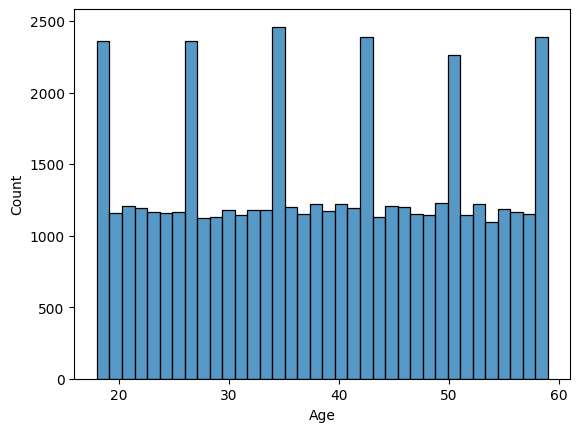

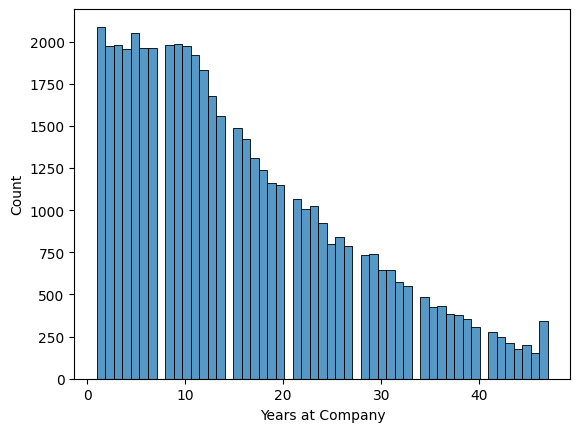

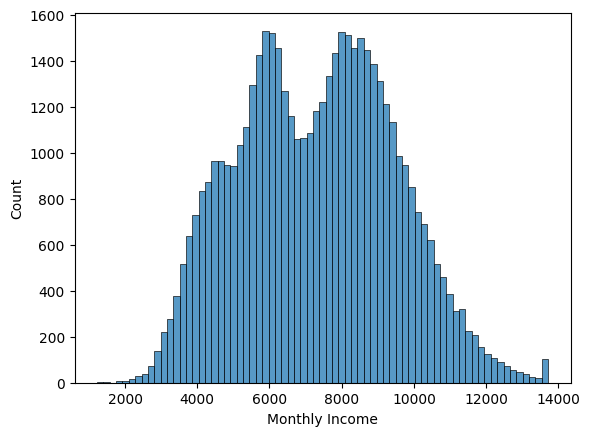

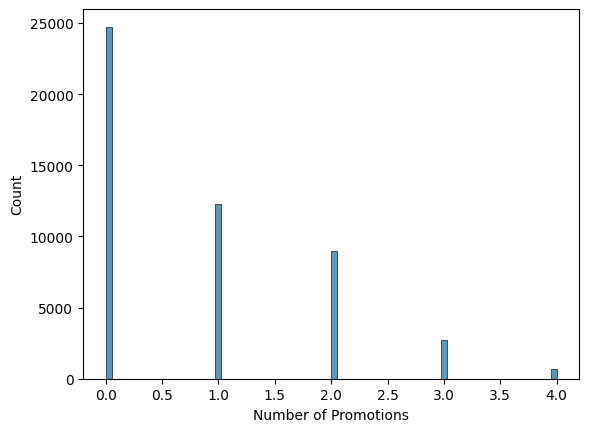

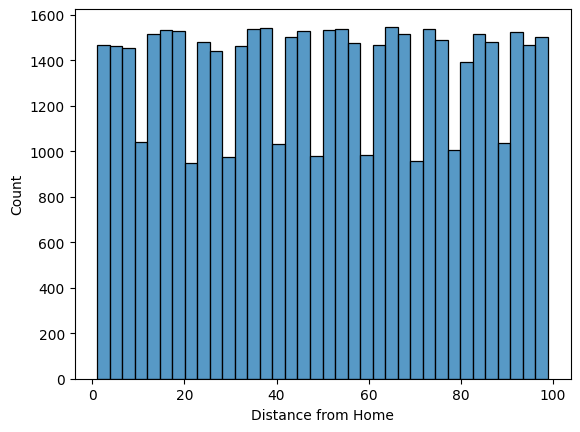

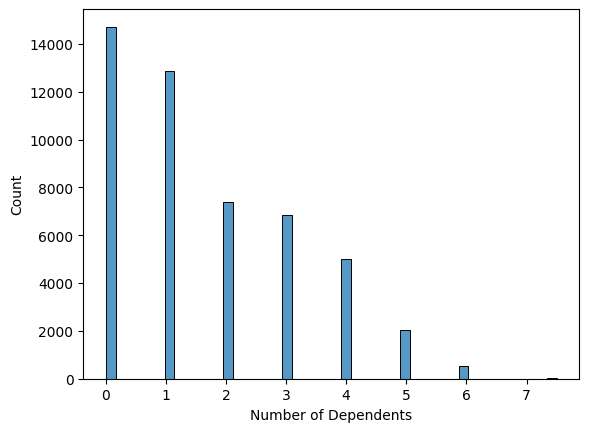

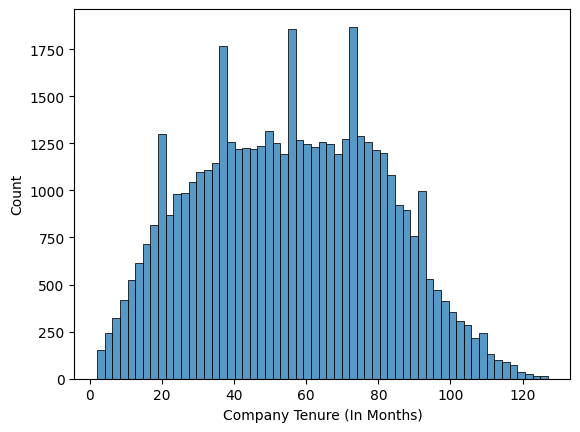

In [798]:
# Plot all the numerical columns to understand their distribution
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

for i in num_col1:
    sns.histplot(x=X_train[i])
    plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

In [801]:
# Create correlation matrix for numerical columns
X_train[num_col1].corr()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
Age,1.000000,0.538786,-0.007227,0.002246,-0.010583,0.002794,0.235361
Years at Company,0.538786,1.000000,-0.007807,0.003384,-0.005834,0.004368,0.443762
Monthly Income,-0.007227,-0.007807,1.000000,-0.000235,-0.003578,-0.004249,-0.008412
Number of Promotions,0.002246,0.003384,-0.000235,1.000000,-0.008784,-0.000445,0.006955
Distance from Home,-0.010583,-0.005834,-0.003578,-0.008784,1.000000,-0.003148,-0.004460
Number of Dependents,0.002794,0.004368,-0.004249,-0.000445,-0.003148,1.000000,-0.002207
Company Tenure (In Months),0.235361,0.443762,-0.008412,0.006955,-0.004460,-0.002207,1.000000


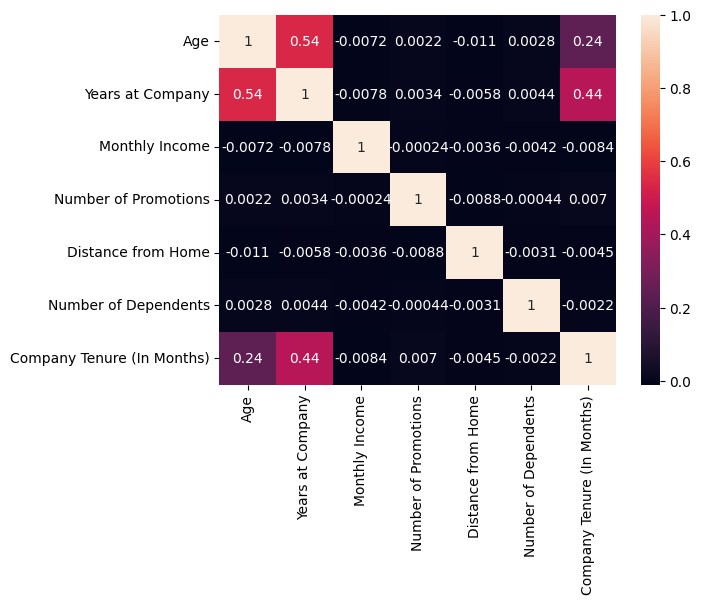

In [802]:
# Plot Heatmap of the correlation matrix
sns.heatmap(X_train[num_col1].corr(),annot=True)
plt.show()

### No strong linear correlations (|r| > 0.7) exist in the dataset. This means features are fairly independent, which could be good for some models like logistic regression or tree-based algorithms.

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

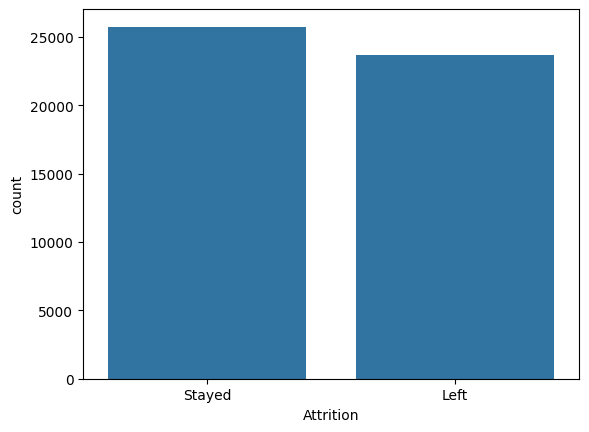

In [805]:
# Plot a bar chart to check class balance
sns.countplot(x=y_train)
plt.show()

### From the above bar chart we can say that the classes are balances and we don't need to do SMOTE to balance the target class

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

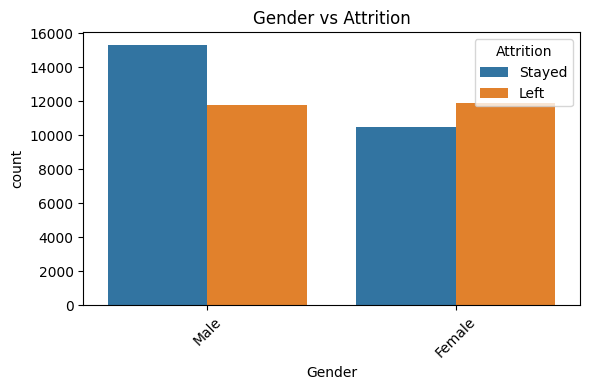

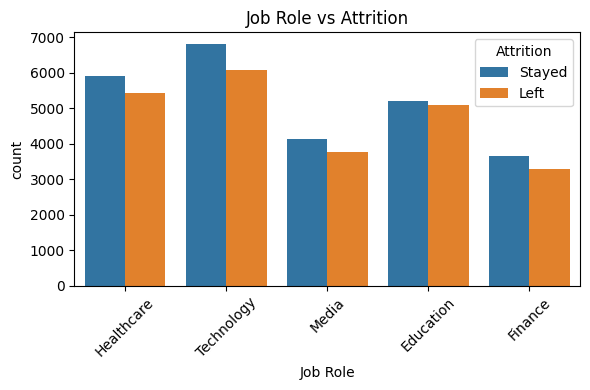

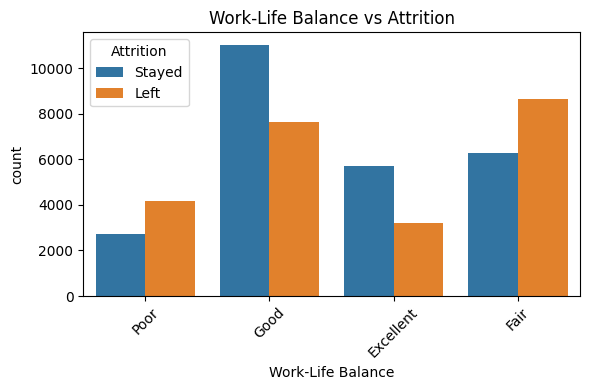

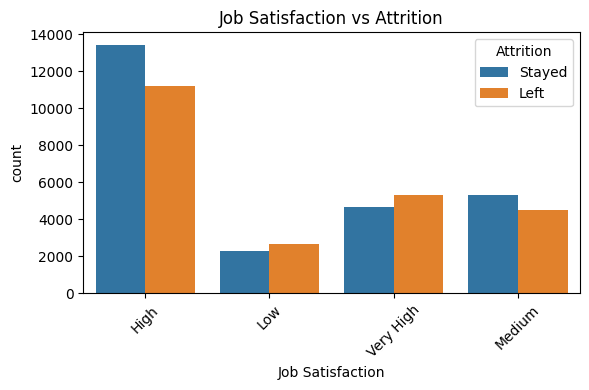

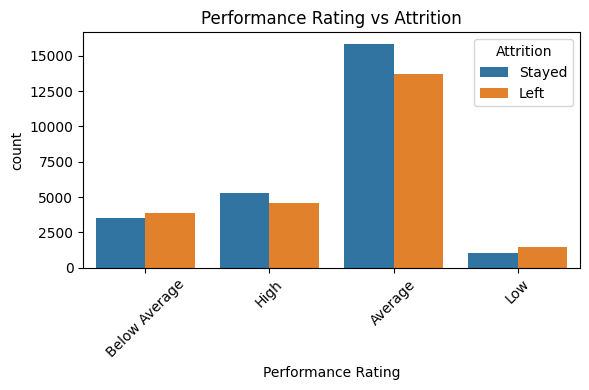

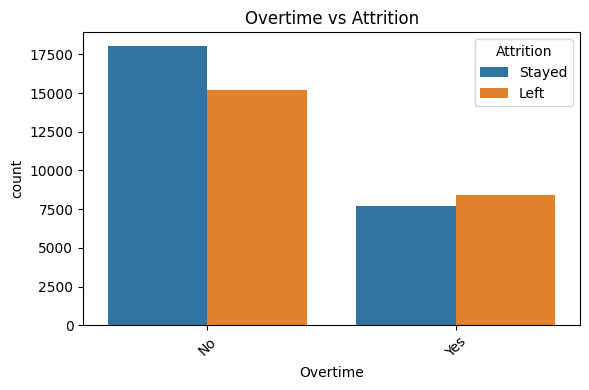

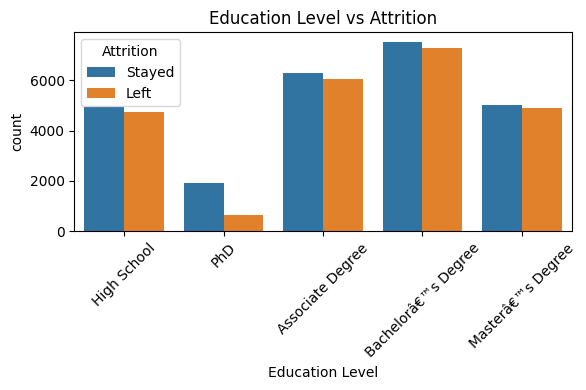

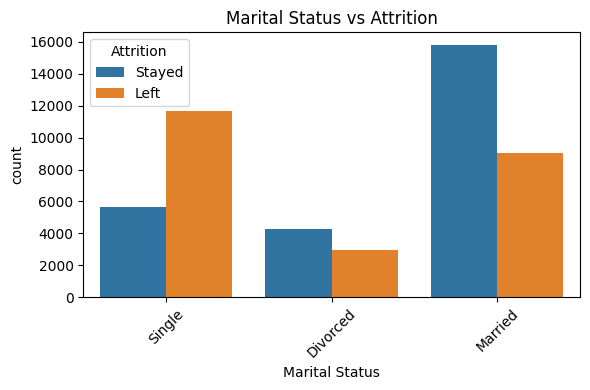

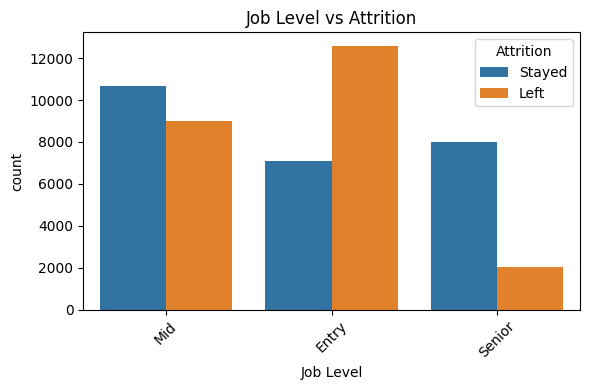

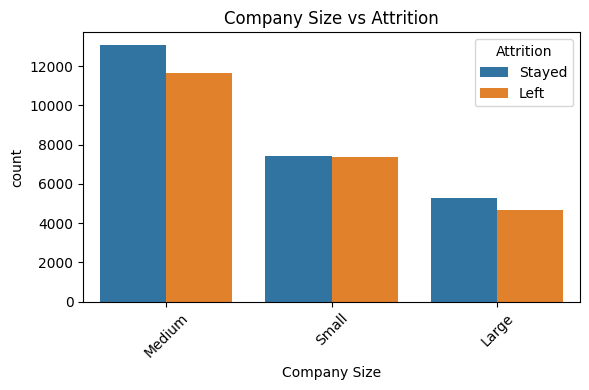

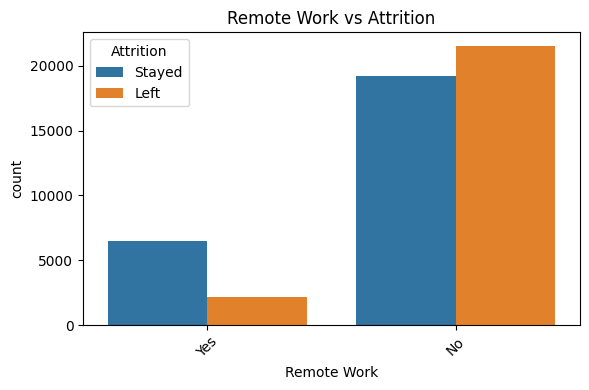

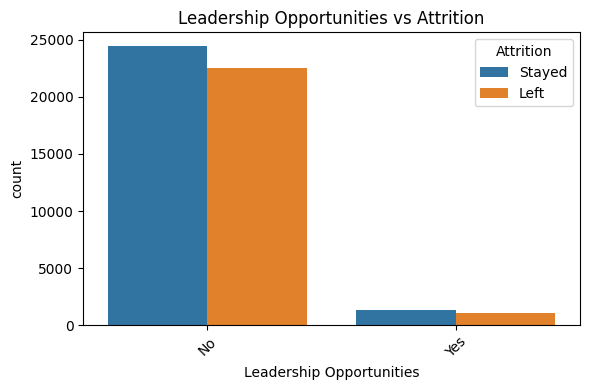

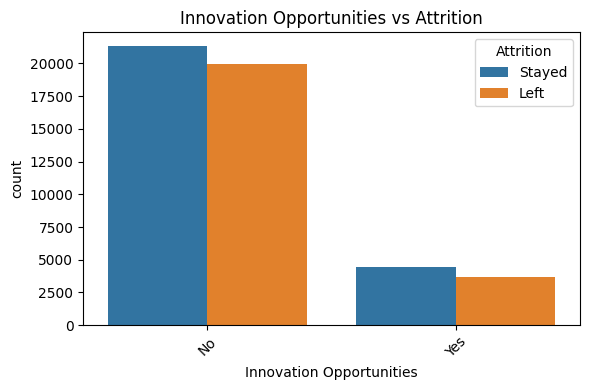

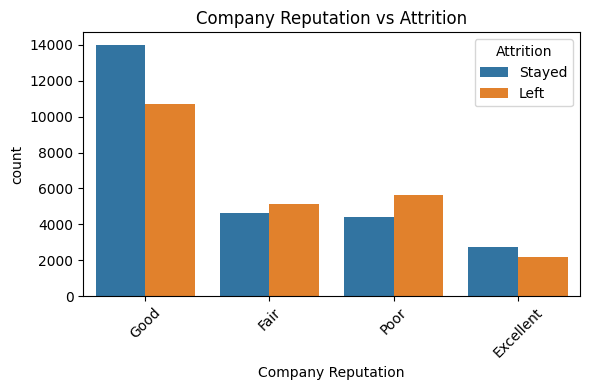

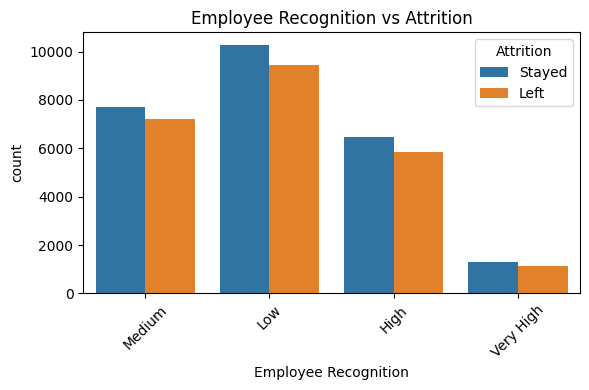

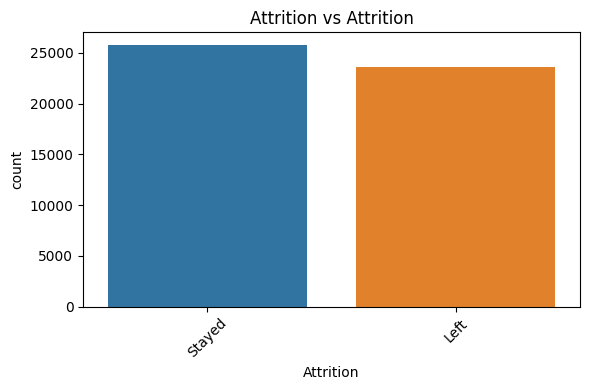

In [809]:
# Plot distribution for each categorical column with target variable

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combine X_train and y_train for analysis
train_data = X_train.copy()
train_data['Attrition'] = y_train

# Loop through all categorical columns
for col in cat_col:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train_data, x=col, hue='Attrition')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [814]:
# Select numerical columns
num_col1

['Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure (In Months)']

5.1.2 Plot distribution of numerical columns

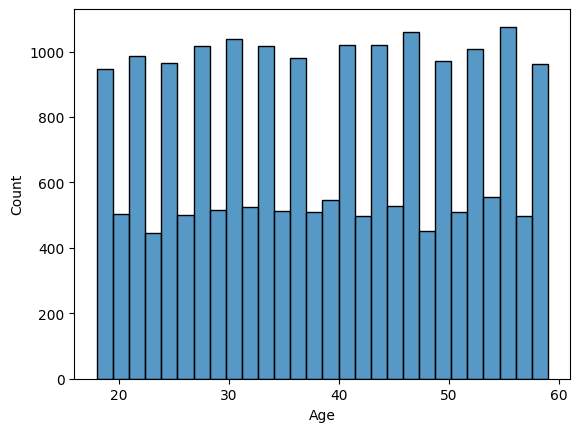

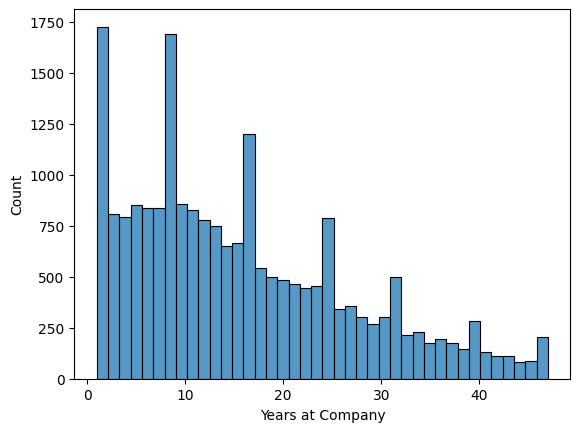

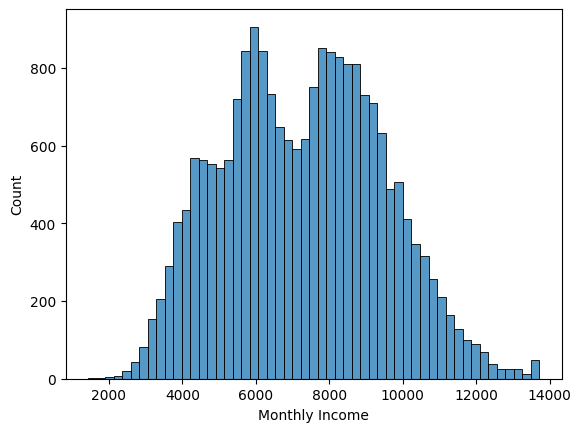

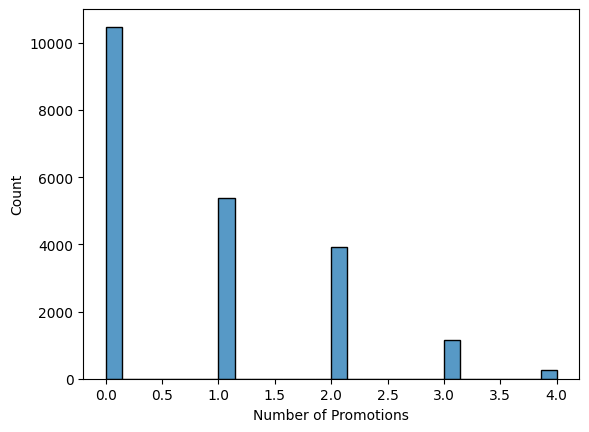

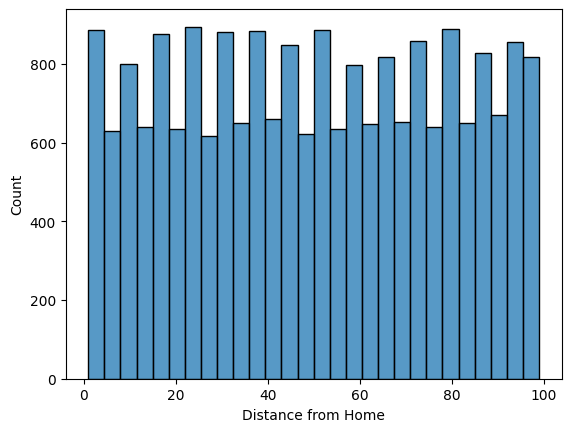

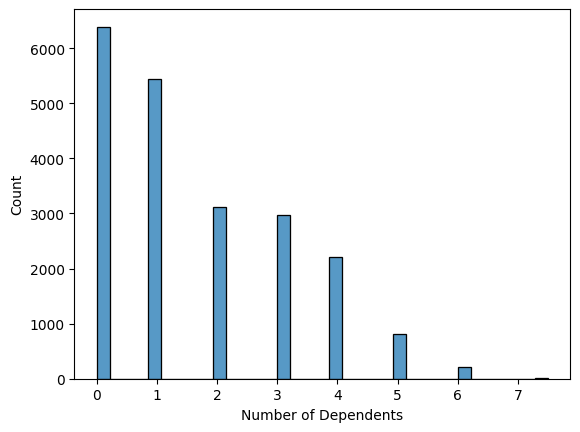

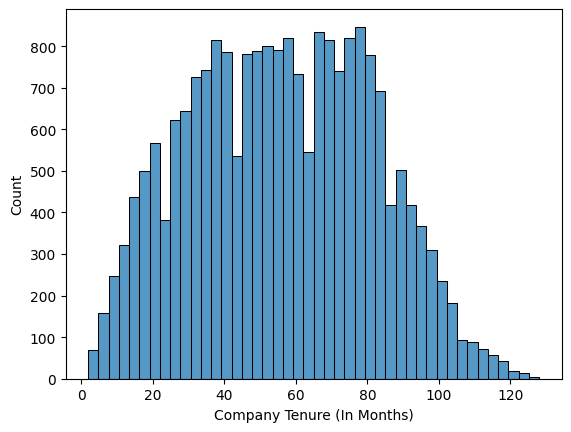

In [816]:
# Plot all the numerical columns to understand their distribution

for i in num_col1:
    sns.histplot(x=X_test[i])
    plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [819]:
# Create correlation matrix for numerical columns

X_test[num_col1].corr()


,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
Age,1.000000,0.531265,0.010170,-0.003485,0.007241,0.003430,0.238941
Years at Company,0.531265,1.000000,0.000267,-0.003573,-0.004816,0.003792,0.439957
Monthly Income,0.010170,0.000267,1.000000,0.017722,-0.000721,0.014634,-0.006446
Number of Promotions,-0.003485,-0.003573,0.017722,1.000000,-0.003882,-0.007198,0.000759
Distance from Home,0.007241,-0.004816,-0.000721,-0.003882,1.000000,0.007645,-0.009815
Number of Dependents,0.003430,0.003792,0.014634,-0.007198,0.007645,1.000000,0.001645
Company Tenure (In Months),0.238941,0.439957,-0.006446,0.000759,-0.009815,0.001645,1.000000


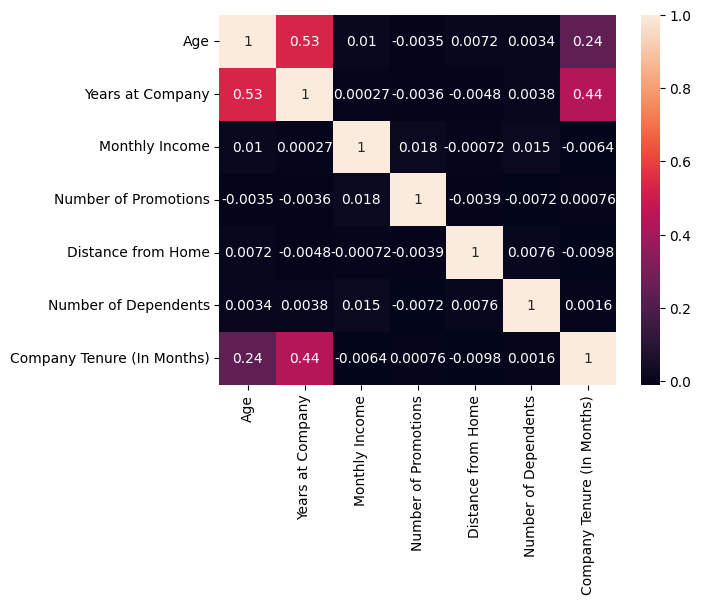

In [820]:
# Plot Heatmap of the correlation matrix
sns.heatmap(X_test[num_col1].corr(),annot=True)
plt.show()

### No strong linear correlations (|r| > 0.7) exist in the dataset. This means features are fairly independent, which could be good for some models like logistic regression or tree-based algorithms.

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

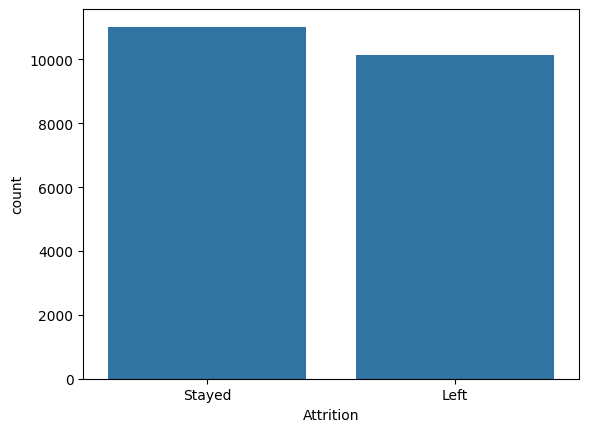

In [824]:
# Plot a bar chart to check class balance

# Plot a bar chart to check class balance
sns.countplot(x=y_test)
plt.show()

### From the above bar chart we can say that the classes are balances and we don't need to do SMOTE to balance the target class

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

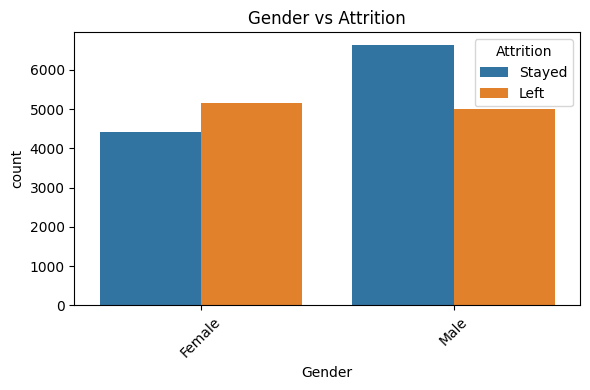

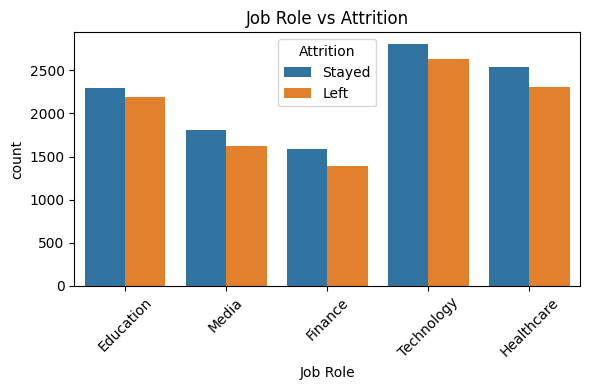

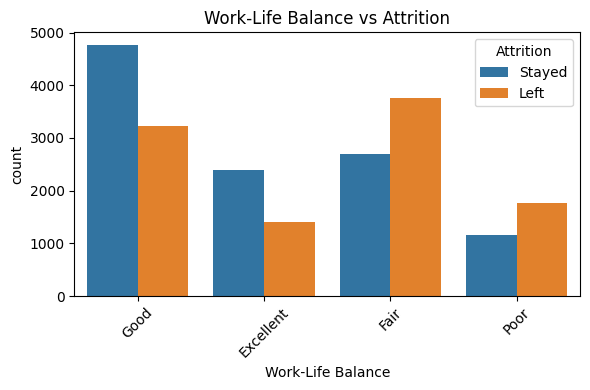

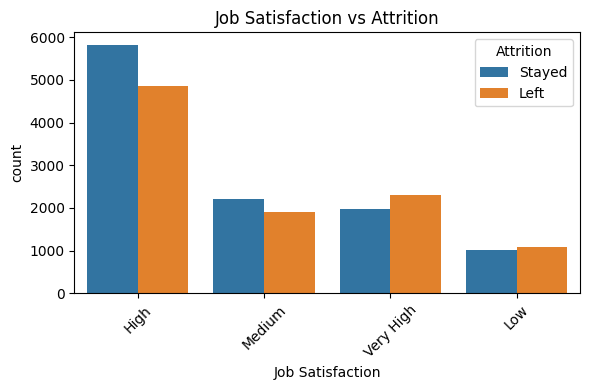

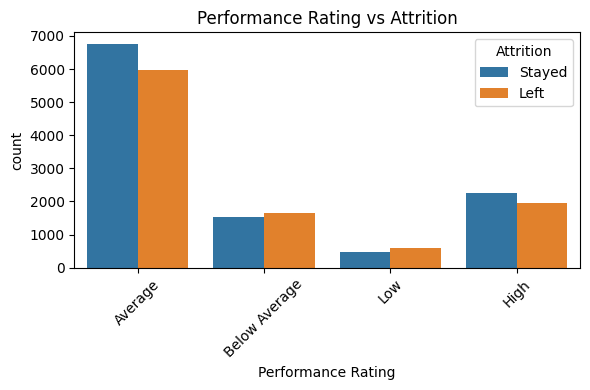

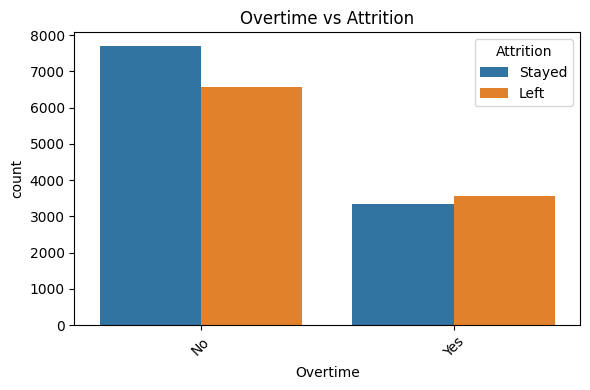

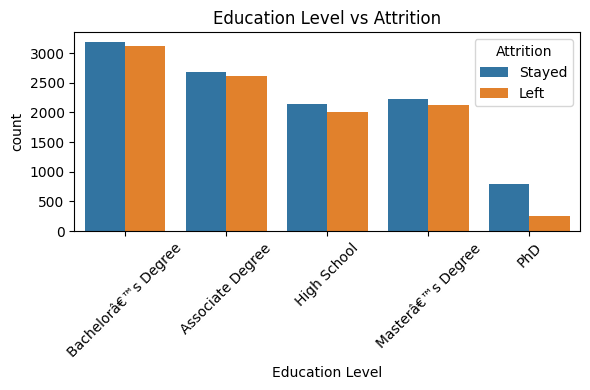

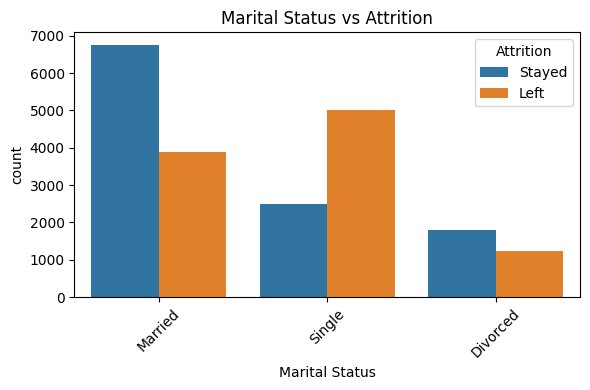

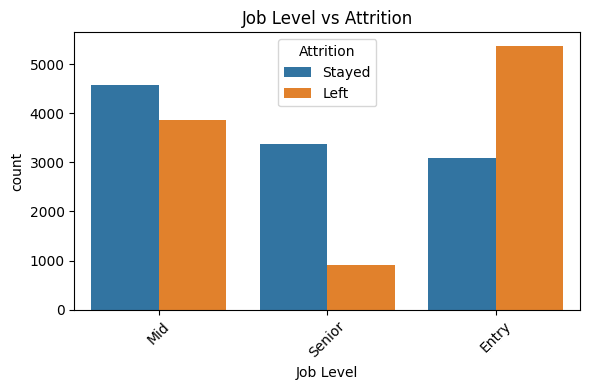

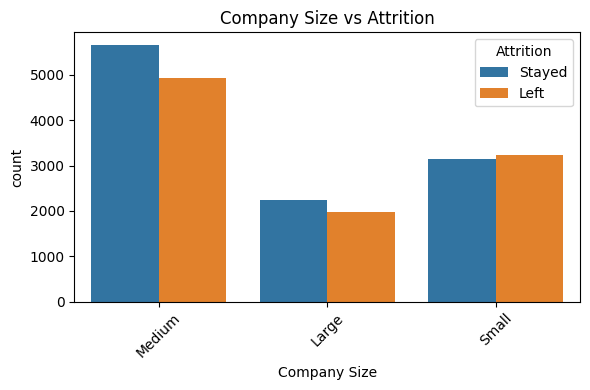

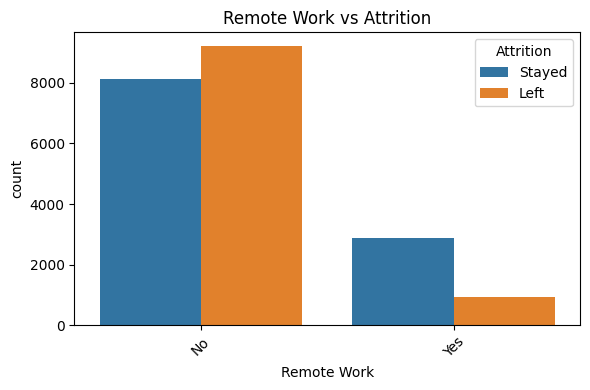

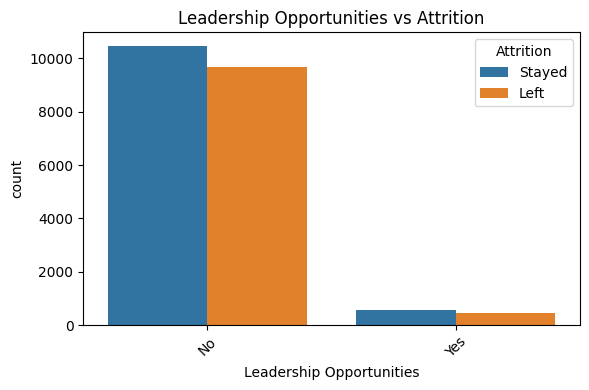

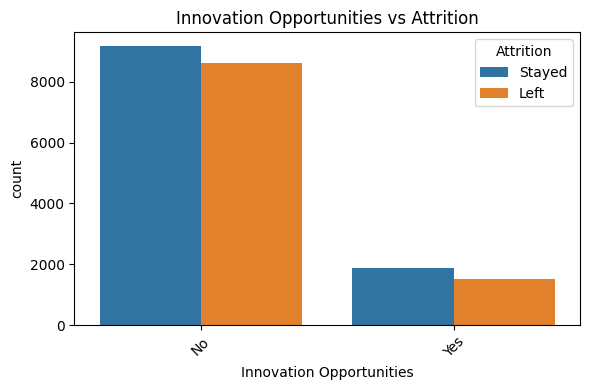

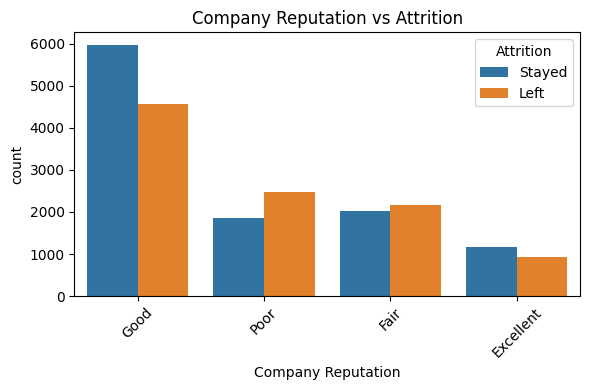

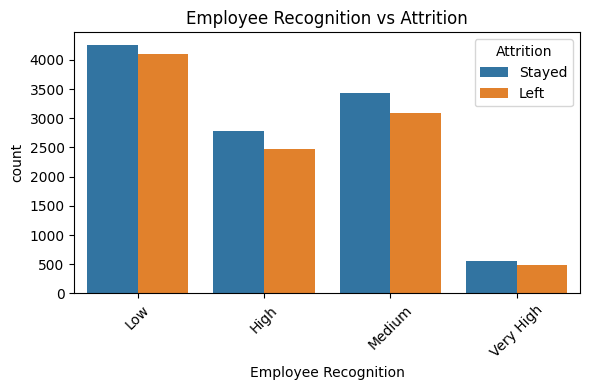

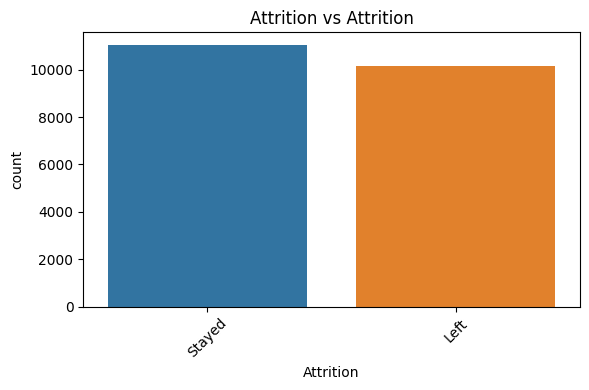

In [828]:
# Plot distribution for each categorical column with target variable

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combine X_train and y_train for analysis
test_data = X_test.copy()
test_data['Attrition'] = y_test

# Loop through all categorical columns
for col in cat_col:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=test_data, x=col, hue='Attrition')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [832]:
# categorical columns

cat_col1

['Gender',
 'Job Role',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Overtime',
 'Education Level',
 'Marital Status',
 'Job Level',
 'Company Size',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Company Reputation',
 'Employee Recognition']

* Also, there are two columns in numric data i.e., "Number of Promotions","Number of Dependents" we can consider them as catagorical data as well, since things promotions and number of dependents is often treated as categorical, especially in HR datasets.  

In [834]:
# Check the categorical columns
new_cat_col = ['Number of Promotions','Number of Dependents','Gender','Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation','Employee Recognition']

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [836]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dummies = pd.get_dummies(X_train, columns=new_cat_col, drop_first=True)

# Add the results to the master DataFrame
X_train = X_train_dummies

Now, drop the original categorical columns and check the DataFrame

In [838]:
# Drop the original categorical columns and check the DataFrame
X_train.head()

,Age,Years at Company,Monthly Income,Distance from Home,Company Tenure (In Months),Number of Promotions_1,Number of Promotions_2,Number of Promotions_3,Number of Promotions_4,Number of Dependents_1.0,Number of Dependents_2.0,Number of Dependents_3.0,Number of Dependents_4.0,Number of Dependents_5.0,Number of Dependents_6.0,Number of Dependents_7.5,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_High,Performance Rating_Low,Overtime_Yes,Education Level_Bachelorâ€™s Degree,Education Level_High School,Education Level_Masterâ€™s Degree,Education Level_PhD,Marital Status_Married,Marital Status_Single,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
43251,37,6.0,7903.0,47.0,19.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0
8228,29,17.0,7070.0,59.0,20.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
57123,25,2.0,7653.0,62.0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0
55882,32,23.0,6171.0,66.0,40.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
14223,41,13.0,9479.0,10.0,55.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [839]:
X_train.shape

(49390, 50)

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [841]:
# Create dummy variables using the 'get_dummies' for independent columns
X_test_dummies = pd.get_dummies(X_test, columns=new_cat_col, drop_first=True)

# Add the results to the master DataFrame
X_test = X_test_dummies

Now, drop the original categorical columns and check the DataFrame

In [843]:
# Drop categorical columns and check the DataFrame
X_test.head()

,Age,Years at Company,Monthly Income,Distance from Home,Company Tenure (In Months),Number of Promotions_1,Number of Promotions_2,Number of Promotions_3,Number of Promotions_4,Number of Dependents_1.0,Number of Dependents_2.0,Number of Dependents_3.0,Number of Dependents_4.0,Number of Dependents_5.0,Number of Dependents_6.0,Number of Dependents_7.5,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_High,Performance Rating_Low,Overtime_Yes,Education Level_Bachelorâ€™s Degree,Education Level_High School,Education Level_Masterâ€™s Degree,Education Level_PhD,Marital Status_Married,Marital Status_Single,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
48013,55,12.0,2890.0,74.0,66.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
57182,47,28.0,5723.0,51.0,39.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0
34902,51,5.0,6540.0,22.0,12.0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
13783,32,4.0,11056.0,7.0,24.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0
32776,27,2.0,8653.0,98.0,19.0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [844]:
X_test.shape

(21168, 50)

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [846]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train = pd.DataFrame(y_train, columns=['Attrition'])
y_test = pd.DataFrame(y_test, columns=['Attrition'])

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [848]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train = pd.get_dummies(y_train, drop_first=True)
y_test = pd.get_dummies(y_test, drop_first=True)

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [850]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train.columns = ['Attrition']
y_test.columns = ['Attrition']

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [852]:
# Drop redundant columns from both train and validation
X_train.head()

,Age,Years at Company,Monthly Income,Distance from Home,Company Tenure (In Months),Number of Promotions_1,Number of Promotions_2,Number of Promotions_3,Number of Promotions_4,Number of Dependents_1.0,Number of Dependents_2.0,Number of Dependents_3.0,Number of Dependents_4.0,Number of Dependents_5.0,Number of Dependents_6.0,Number of Dependents_7.5,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_High,Performance Rating_Low,Overtime_Yes,Education Level_Bachelorâ€™s Degree,Education Level_High School,Education Level_Masterâ€™s Degree,Education Level_PhD,Marital Status_Married,Marital Status_Single,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
43251,37,6.0,7903.0,47.0,19.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0
8228,29,17.0,7070.0,59.0,20.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
57123,25,2.0,7653.0,62.0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0
55882,32,23.0,6171.0,66.0,40.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
14223,41,13.0,9479.0,10.0,55.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [855]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [857]:
# Scale the numeric features present in the training set
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
# Scale the numerical features present in the validation set
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [858]:
X_train_scaled.head(2)

,Age,Years at Company,Monthly Income,Distance from Home,Company Tenure (In Months),Number of Promotions_1,Number of Promotions_2,Number of Promotions_3,Number of Promotions_4,Number of Dependents_1.0,Number of Dependents_2.0,Number of Dependents_3.0,Number of Dependents_4.0,Number of Dependents_5.0,Number of Dependents_6.0,Number of Dependents_7.5,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Medium,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_High,Performance Rating_Low,Overtime_Yes,Education Level_Bachelorâ€™s Degree,Education Level_High School,Education Level_Masterâ€™s Degree,Education Level_PhD,Marital Status_Married,Marital Status_Single,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,0.463415,0.108696,0.534679,0.469388,0.136,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.268293,0.347826,0.467974,0.591837,0.144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [862]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [864]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=15)# n_features_to_select generally ranges in 8 to 20
selector.fit(X_train_scaled,y_train)
selector.support_

array([False,  True, False,  True, False, False, False,  True,  True,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True,  True, False, False,  True, False, False, False,
       False,  True, False, False, False])

In [865]:
# Display the features selected by RFE
cols_to_keep=X_train_scaled.columns[selector.support_]
cols_to_keep

Index(['Years at Company', 'Distance from Home', 'Number of Promotions_3',
       'Number of Promotions_4', 'Number of Dependents_4.0',
       'Number of Dependents_5.0', 'Number of Dependents_6.0',
       'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Poor'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [867]:
# Put columns selected by RFE into variable 'col'
col = cols_to_keep
col

Index(['Years at Company', 'Distance from Home', 'Number of Promotions_3',
       'Number of Promotions_4', 'Number of Dependents_4.0',
       'Number of Dependents_5.0', 'Number of Dependents_6.0',
       'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Poor'],
      dtype='object')

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [1060]:
# Select only the columns selected by RFE
X_train=X_train_scaled[col]

In [871]:
# View the training data
print("Train X shape:",X_train.shape)
print("Test X shape:",X_test.shape)
print("Train y shape:",y_train.shape)
print("Test y shape:",y_test.shape)

Train X shape: (49390, 15)
Test X shape: (21168, 15)
Train y shape: (49390, 1)
Test y shape: (21168, 1)


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [1062]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train,has_constant="add")

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [875]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
model1=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
# Binomial --> Binary Classification
result1=model1.fit()
result1.summary()
#Generalised Linear Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                49390
Model:                            GLM   Df Residuals:                    49374
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24523.
Date:                Fri, 23 May 2025   Deviance:                       49046.
Time:                        14:46:09   Pearson chi2:                 4.57e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3239
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0918      0.033      2.795      0.005       0.027       0.156
Years at Company             0.7939      0.046     17.340      0.000       0.704       0.884
Distance from Home          -0.9344      0.038    -24.278      0.000      -1.010      -0.859
Number of Promotions_3       1.5912      0.055     29.197      0.000       1.484       1.698
Number of Promotions_4       1.5471      0.105     14.746      0.000       1.341       1.753
Number of Dependents_4.0     0.8460      0.038     22.382      0.000       0.772       0.920
Number of Dependents_5.0     0.8567      0.057     14.959      0.000       0.744       0.969
Number of Dependents_6.0     0.7692      0.109      7.055      0.000       0.556       0.983
Work-Life Balance_Fair      -1.1171      0.026    -43.629      0.000      -1.167      -1.067
Work-Life Balance_Poor      -1.2972      0.034    -37.876      0.000      -1.364      -1.230
Education Level_PhD          1.5520      0.056     27.764      0.000       1.442       1.662
Marital Status_Single       -1.7410      0.025    -69.411      0.000      -1.790      -1.692
Job Level_Mid                0.9868      0.025     40.199      0.000       0.939       1.035
Job Level_Senior             2.5865      0.035     73.810      0.000       2.518       2.655
Remote Work_Yes              1.7429      0.033     53.521      0.000       1.679       1.807
Company Reputation_Poor     -0.6149      0.028    -22.048      0.000      -0.670      -0.560
============================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [878]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [879]:
# Make a VIF DataFrame for all the variables present
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,9.331510
1,Years at Company,1.000352
2,Distance from Home,1.000552
3,Number of Promotions_3,1.001026
4,Number of Promotions_4,1.000930
5,Number of Dependents_4.0,1.006576
6,Number of Dependents_5.0,1.005813
7,Number of Dependents_6.0,1.001949
8,Work-Life Balance_Fair,1.075524
9,Work-Life Balance_Poor,1.075751


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [882]:
# Predict the probabilities on the training set
y_train_pred = result1.predict(X_train_sm)
y_train_pred[:10]

0    0.735419
1    0.690351
2    0.887764
3    0.698164
4    0.553077
5    0.976822
6    0.554419
7    0.087697
8    0.293598
9    0.536857
dtype: float64

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [884]:
# Reshape it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73541884, 0.69035124, 0.88776434, 0.69816444, 0.55307688,
       0.97682227, 0.55441905, 0.08769657, 0.29359784, 0.53685703])

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [887]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({
    'Stayed': y_train.values.ravel(),
    'Styed_Prob': y_train_pred
})
y_train_pred_final["Index"] = y_train.index
y_train_pred_final.head()

,Stayed,Styed_Prob,Index
0,1,0.735419,43251
1,1,0.690351,8228
2,1,0.887764,57123
3,1,0.698164,55882
4,1,0.553077,14223


In [888]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final['Styed_Prob'].apply(lambda x: 1 if x > 0.5 else 0)

In [889]:
y_train_pred_final.head()

,Stayed,Styed_Prob,Index,Predicted
0,1,0.735419,43251,1
1,1,0.690351,8228,1
2,1,0.887764,57123,1
3,1,0.698164,55882,1
4,1,0.553077,14223,1


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [892]:
# Import metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Compare actual (Stayed) vs predicted values
accuracy = accuracy_score(y_train_pred_final['Stayed'], y_train_pred_final['Predicted'])
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7449


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [894]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_train_pred_final['Stayed'], y_train_pred_final['Predicted'])

# Extract TN, FP, FN, TP from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Print confusion matrix and components
print("Confusion Matrix:\n", conf_matrix)



Confusion Matrix:
 [[17428  6217]
 [ 6382 19363]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [896]:
# Create variables for true positive, true negative, false positive and false negative
print(f"\nTrue Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")


True Negatives (TN): 17428
False Positives (FP): 6217
False Negatives (FN): 6382
True Positives (TP): 19363


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [898]:
# Calculate sensitivity
# Sensitivity / Recall: TP / (TP + FN)
sensitivity = TP / (TP + FN)
print(f"\nSensitivity (Recall): {sensitivity:.4f}")


Sensitivity (Recall): 0.7521


In [899]:
# Calculate specificity
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.7371


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [901]:
# Calculate precision
precision = TP / (TP + FP)
print(f"Precision: {precision:.4f}")

Precision: 0.7570


In [902]:
# Calculate recall
recall = sensitivity
print(f"Recall: {recall:.4f}")

Recall: 0.7521


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

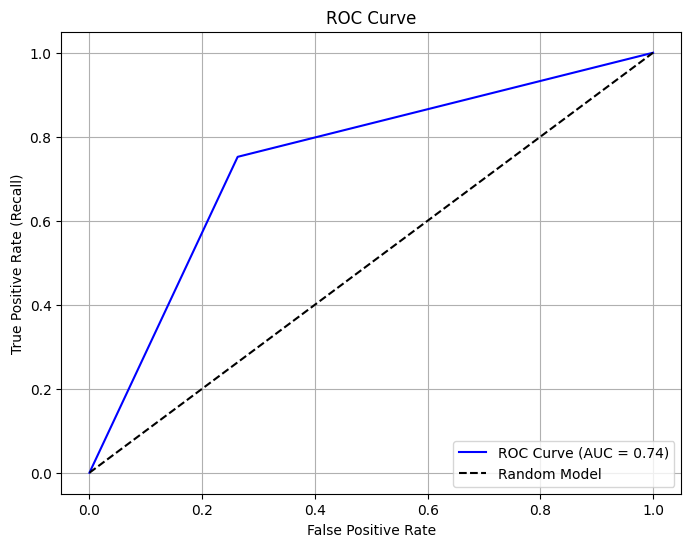

In [905]:
# Define ROC function
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Call the ROC function
# ROC values
fpr, tpr, thresholds = roc_curve(y_train_pred_final["Stayed"], y_train_pred_final["Predicted"])
roc_auc = roc_auc_score(y_train_pred_final["Stayed"], y_train_pred_final["Predicted"])

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [908]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
y_prob = result1.predict(X_train_sm)

# Convert predicted probabilities to a Series with the same index as y_train
y_prob_series = pd.Series(y_prob, index=y_train.index)

# Define cutoff thresholds
cutoffs = np.arange(0.1, 0.9, 0.05)

# Create the base DataFrame
cutoff_preds_df = pd.DataFrame({'Actual': y_train.squeeze()})

# Add predicted class for each cutoff
for cutoff in cutoffs:
    cutoff_preds_df[f'Pred_{cutoff:.2f}'] = (y_prob_series >= cutoff).astype(int)

cutoff_preds_df.head()

,Actual,Pred_0.10,Pred_0.15,Pred_0.20,Pred_0.25,Pred_0.30,Pred_0.35,Pred_0.40,Pred_0.45,Pred_0.50,Pred_0.55,Pred_0.60,Pred_0.65,Pred_0.70,Pred_0.75,Pred_0.80,Pred_0.85
43251,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
8228,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
57123,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55882,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14223,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [910]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

from sklearn.metrics import confusion_matrix

y_prob = result1.predict(X_train_sm)

# Define probability cutoffs
cutoffs = np.arange(0.1, 0.9, 0.05)

# Lists to store metrics
accuracy_list = []
sensitivity_list = []
specificity_list = []

for cutoff in cutoffs:
    y_pred = (y_prob >= cutoff).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)  # recall
    specificity = tn / (tn + fp)

    accuracy_list.append(accuracy)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)

# Create DataFrame
import pandas as pd

cutoff_df = pd.DataFrame({
    'Cutoff': cutoffs,
    'Accuracy': accuracy_list,
    'Sensitivity (Recall)': sensitivity_list,
    'Specificity': specificity_list
})

cutoff_df

,Cutoff,Accuracy,Sensitivity (Recall),Specificity
0,0.10,0.595343,0.994756,0.160457
1,0.15,0.638712,0.981239,0.265764
2,0.20,0.669994,0.959759,0.354494
3,0.25,0.693764,0.937269,0.428632
4,0.30,0.710771,0.909225,0.494692
5,0.35,0.725855,0.876209,0.562148
6,0.40,0.736890,0.839076,0.625629
7,0.45,0.743207,0.796776,0.684881
8,0.50,0.744908,0.752107,0.737069
9,0.55,0.743268,0.708060,0.781603


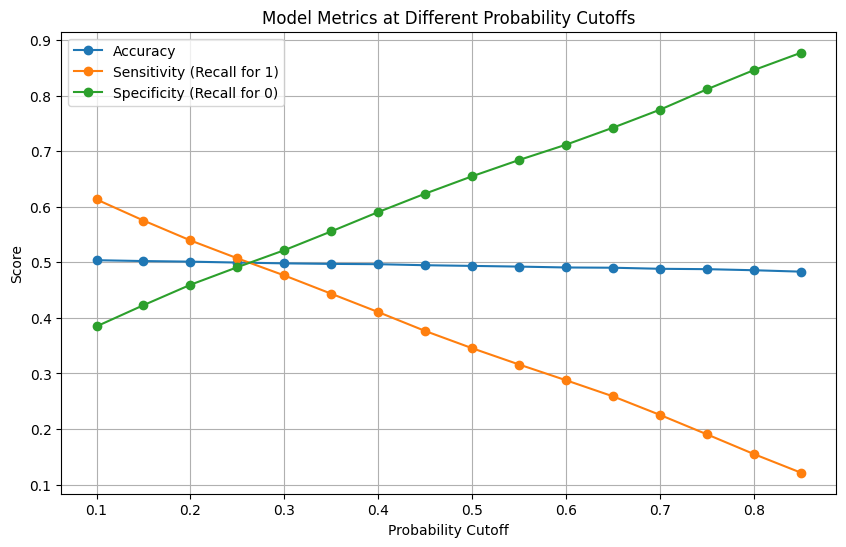

In [911]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Lists to store metrics
cutoffs = np.arange(0.1, 0.9, 0.05)
accuracy_list = []
sensitivity_list = []
specificity_list = []

# Loop through each cutoff
for cutoff in cutoffs:
    y_pred = cutoff_preds_df[f'Pred_{cutoff:.2f}']
    y_true = cutoff_preds_df['Actual']
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall for class 1
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # Recall for class 0

    accuracy_list.append(accuracy)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cutoffs, accuracy_list, label='Accuracy', marker='o')
plt.plot(cutoffs, sensitivity_list, label='Sensitivity (Recall for 1)', marker='o')
plt.plot(cutoffs, specificity_list, label='Specificity (Recall for 0)', marker='o')
plt.xlabel('Probability Cutoff')
plt.ylabel('Score')
plt.title('Model Metrics at Different Probability Cutoffs')
plt.legend()
plt.grid(True)
plt.show()


7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [1011]:
# Create a column for final prediction based on the optimal cutoff

# *Finding optimal cutoff using roc 

from sklearn.metrics import roc_curve
import numpy as np

# Step 1: Predict probabilities on the training set
y_prob = result1.predict(X_train_sm)

# Step 2: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_prob)

# Step 3: Compute Youden’s Index
youden_index = tpr - fpr

# Step 4: Get the threshold where Youden’s Index is maximum
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

# Output the optimal threshold
print("Optimal Probability Threshold:", optimal_threshold)

Optimal Probability Threshold: 0.543512037060005


In [914]:
# Create a column for final prediction based on the optimal cutoff

y_train_pred_optimal_cutoff_ROC = pd.DataFrame({
    'Stayed': y_train.values.ravel(),
    'Styed_Prob': y_prob
})
y_train_pred_optimal_cutoff_ROC["Index"] = y_train.index
y_train_pred_optimal_cutoff_ROC["y_pred_optimal_roc"] = (y_prob >= optimal_threshold).astype(int)
y_train_pred_optimal_cutoff_ROC.head()

,Stayed,Styed_Prob,Index,y_pred_optimal_roc
0,1,0.735419,43251,1
1,1,0.690351,8228,1
2,1,0.887764,57123,1
3,1,0.698164,55882,1
4,1,0.553077,14223,1


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [942]:
# Calculate the accuracy
print("Accuracy:", accuracy_score(y_train_pred_optimal_cutoff_ROC["Stayed"], y_train_pred_optimal_cutoff_ROC["y_pred_optimal_roc"]))

Accuracy: 0.74421947762705


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [944]:
# Create the confusion matrix once again
print("\nConfusion Matrix:\n", confusion_matrix(y_train_pred_optimal_cutoff_ROC["Stayed"], y_train_pred_optimal_cutoff_ROC["y_pred_optimal_roc"]))


Confusion Matrix:
 [[18365  5280]
 [ 7353 18392]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [1064]:
# Create variables for true positive, true negative, false positive and false negative
cm = confusion_matrix(y_train_pred_optimal_cutoff_ROC["Stayed"], y_train_pred_optimal_cutoff_ROC["y_pred_optimal_roc"])
tn_roc_threshold, fp_roc_threshold, fn_roc_threshold, tp_roc_threshold = cm.ravel()
print("Confusion Matrix:\n", cm)
print("TP1 =", tp_roc_threshold)
print("TN1 =", tn_roc_threshold)
print("FP1 =", fp_roc_threshold)
print("FN1 =", fn_roc_threshold)

Confusion Matrix:
 [[18365  5280]
 [ 7353 18392]]
TP1 = 18392
TN1 = 18365
FP1 = 5280
FN1 = 7353


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [1066]:
# Calculate Sensitivity
sensitivity = tp_roc_threshold / (tp_roc_threshold + fn_roc_threshold)
print(f"\nSensitivity (Recall): {sensitivity:.4f}")


Sensitivity (Recall): 0.7144


In [1068]:
# Calculate Specificity
specificity = tn_roc_threshold / (tn_roc_threshold + fp_roc_threshold)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.7767


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [1071]:
# Calculate Precision
precision = tp_roc_threshold / (tp_roc_threshold + fp_roc_threshold)
print(f"Precision: {precision:.4f}")

Precision: 0.7770


In [1073]:
# Calculate Recall
recall = sensitivity
print(f"Recall: {recall:.4f}")

Recall: 0.7144


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [1076]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [1078]:
# Check actual and predicted values from initial model
# Step 1: Predict probabilities on the training set
y_prob = result1.predict(X_train_sm)

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

In [1081]:
# Plot precision-recall curve
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get precision, recall, thresholds for PR curve
precision, recall, pr_thresholds = precision_recall_curve(y_train, y_prob)

# Compute F1 for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # add epsilon to avoid divide-by-zero
best_idx = np.argmax(f1_scores)
optimal_pr_threshold = pr_thresholds[best_idx]
optimal_pr_threshold

0.36927038380466265

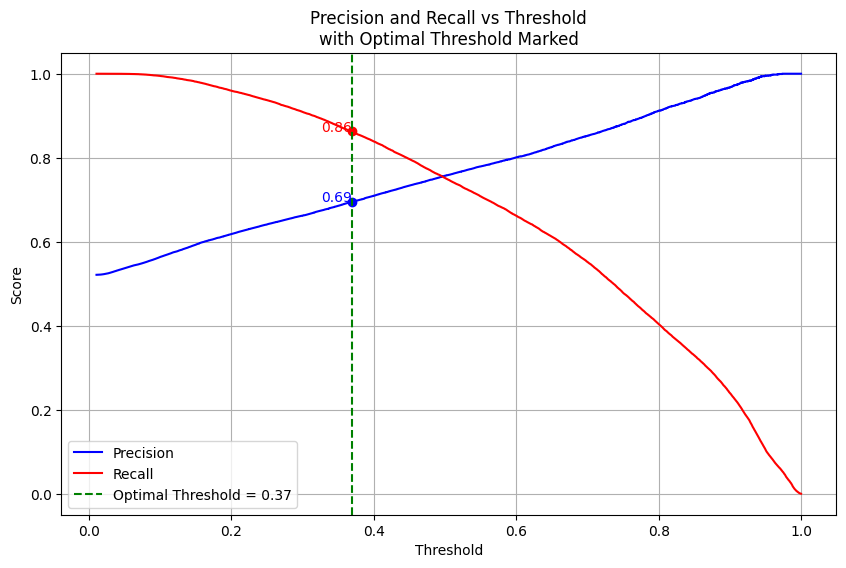

In [1083]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_train, y_prob)

# Compute F1 scores and find best index
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[best_idx]

# Trim precision and recall to match threshold length
precision = precision[:-1]
recall = recall[:-1]

# Plot precision and recall vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision, label='Precision', color='b')
plt.plot(thresholds, recall, label='Recall', color='r')
plt.axvline(optimal_threshold, color='g', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.scatter(optimal_threshold, precision[best_idx], color='blue')
plt.scatter(optimal_threshold, recall[best_idx], color='red')
plt.text(optimal_threshold, precision[best_idx], f'{precision[best_idx]:.2f}', color='blue', ha='right')
plt.text(optimal_threshold, recall[best_idx], f'{recall[best_idx]:.2f}', color='red', ha='right')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold\nwith Optimal Threshold Marked')
plt.legend()
plt.grid(True)
plt.show()

In [1085]:
# creating a dataframe with the threshold using precision-recall call!

# Create a column for final prediction based on the optimal cutoff

y_prob = result1.predict(X_train_sm)
y_train_pred_optimal_cutoff_PR = pd.DataFrame({
    'Stayed': y_train.values.ravel(),
    'Styed_Prob': y_prob
})
y_train_pred_optimal_cutoff_PR["Index"] = y_train.index
y_train_pred_optimal_cutoff_PR["y_pred_optimal_PR"] = (y_prob >= optimal_pr_threshold).astype(int)
y_train_pred_optimal_cutoff_PR.head()

,Stayed,Styed_Prob,Index,y_pred_optimal_PR
0,1,0.735419,43251,1
1,1,0.690351,8228,1
2,1,0.887764,57123,1
3,1,0.698164,55882,1
4,1,0.553077,14223,1


In [1087]:
# Calculate the accuracy
print("Accuracy:", accuracy_score(y_train_pred_optimal_cutoff_PR["Stayed"], y_train_pred_optimal_cutoff_PR["y_pred_optimal_PR"]))

Accuracy: 0.7309576837416482


In [1089]:
CM_PR = confusion_matrix(y_train_pred_optimal_cutoff_PR["Stayed"], y_train_pred_optimal_cutoff_PR["y_pred_optimal_PR"])
tn_optimal_cutoff_PR, fp_optimal_cutoff_PR, fn_optimal_cutoff_PR, tp_optimal_cutoff_PR = CM_PR.ravel()
print("Confusion Matrix:\n", CM_PR)
print("TP2 =", tp_optimal_cutoff_PR)
print("TN2 =", tn_optimal_cutoff_PR)
print("FP2 =", fp_optimal_cutoff_PR)
print("FN2 =", fn_optimal_cutoff_PR)

Confusion Matrix:
 [[13898  9747]
 [ 3541 22204]]
TP2 = 22204
TN2 = 13898
FP2 = 9747
FN2 = 3541


In [1091]:
# Calculate Sensitivity
sensitivity = tp_optimal_cutoff_PR / (tp_optimal_cutoff_PR + fn_optimal_cutoff_PR)
print(f"\nSensitivity (Recall): {sensitivity:.4f}")


Sensitivity (Recall): 0.8625


In [1093]:
# Calculate Specificity
specificity = tn_optimal_cutoff_PR / (tn_optimal_cutoff_PR + fp_optimal_cutoff_PR)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.5878


In [1095]:
# Calculate Precision
precision = tp_optimal_cutoff_PR / (tp_optimal_cutoff_PR + fp_optimal_cutoff_PR)
print(f"Precision: {precision:.4f}")

Precision: 0.6949


In [1097]:
# Calculate Recall
recall = sensitivity
print(f"Recall: {recall:.4f}")

Recall: 0.8625


## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [1102]:
# Select the relevant features for validation set
X_test=X_test_scaled[col]

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [1105]:
# Add constant to X_validation
X_test_sm=sm.add_constant(X_test,has_constant="add")

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [1108]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'

y_validation_pred = result1.predict(X_test_sm)
y_train_pred[:10]

array([0.73541884, 0.69035124, 0.88776434, 0.69816444, 0.55307688,
       0.97682227, 0.55441905, 0.08769657, 0.29359784, 0.53685703])

In [1110]:
# View predictions
y_validation_pred = y_validation_pred.values.reshape(-1)
y_validation_pred[:10]

array([0.63932779, 0.33778953, 0.72059971, 0.08318043, 0.27967158,
       0.91762313, 0.57869924, 0.74412551, 0.87236219, 0.55546575])

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [1113]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'

# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
y_validation_pred_final = pd.DataFrame({
    'Stayed': y_test.values.ravel(),
    'Styed_Prob': y_validation_pred
})
y_validation_pred_final["Index"] = y_test.index
y_validation_pred_final.head()

,Stayed,Styed_Prob,Index
0,1,0.639328,48013
1,1,0.337790,57182
2,1,0.720600,34902
3,0,0.083180,13783
4,0,0.279672,32776


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [1116]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
y_validation_pred_final["final_prediction"] = (y_validation_pred_final["Styed_Prob"] >= optimal_threshold).astype(int)
y_validation_pred_final.head()


,Stayed,Styed_Prob,Index,final_prediction
0,1,0.639328,48013,1
1,1,0.337790,57182,0
2,1,0.720600,34902,1
3,0,0.083180,13783,0
4,0,0.279672,32776,0


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [1119]:
# Calculate the overall accuracy
print("Accuracy:", accuracy_score(y_validation_pred_final["Stayed"], y_validation_pred_final["final_prediction"]))

Accuracy: 0.729119425547997


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [1122]:
# Create confusion matrix
CM_test_set = confusion_matrix(y_validation_pred_final["Stayed"], y_validation_pred_final["final_prediction"])
tn_test, fp_test, fn_test, tp_test = CM_test_set.ravel()
print("Confusion Matrix:\n", CM_test_set)

Confusion Matrix:
 [[5953 4189]
 [1545 9481]]


In [1124]:
# Create variables for true positive, true negative, false positive and false negative
print("TP_test =", tp_test)
print("TN_test =", tn_test)
print("FP_test =", fp_test)
print("FN_test =", fn_test)

TP_test = 9481
TN_test = 5953
FP_test = 4189
FN_test = 1545


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [1127]:
# Calculate sensitivity

sensitivity = tp_test/(tp_test  + fn_test)
print(f"\nSensitivity (Recall): {sensitivity:.4f}")


Sensitivity (Recall): 0.8599


In [1129]:
# Calculate specificity

specificity = tn_test / (tn_test + fp_test)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.5870


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [1132]:
# Calculate precision
precision = tp_test / (tp_test + fp_test)
print(f"Precision: {precision:.4f}")

Precision: 0.6936


In [1134]:
# Calculate recall
recall = sensitivity
print(f"Recall: {recall:.4f}")

Recall: 0.8599


## Conclusion




•	The logistic regression model successfully meets the objective of predicting employee retention.

•	It provides interpretable insights and performs well on relevant classification metrics.

•	This model can be integrated into HR dashboards to assist with retention analytics.
